In [68]:
"""Graphs generator module."""
import random
import networkx as nx
import matplotlib.pyplot as plt

from itertools import combinations, groupby

In [69]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               draw: bool = False) -> list[tuple[int, int]]:
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted.
    """

    edges = combinations(range(num_of_nodes), 2)
    G = nx.Graph()
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(0,10)
                
    if draw: 
        plt.figure(figsize=(10,6))
        nx.draw(G, node_color='lightblue', 
            with_labels=True, 
            node_size=500)
    
    return G

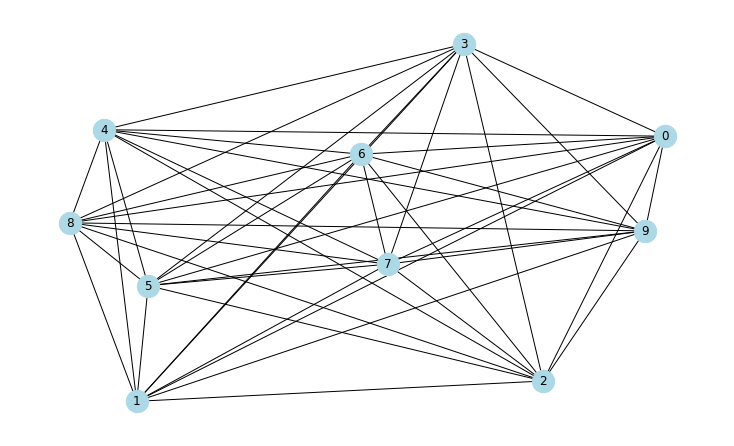

In [70]:
G = gnp_random_connected_graph(10, 1, True)

In [71]:
from networkx.algorithms import tree

In [72]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

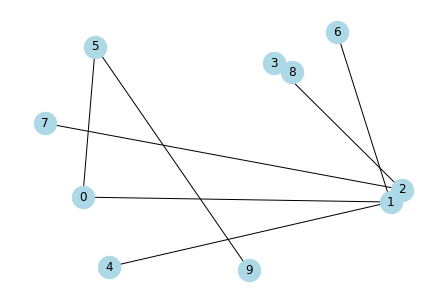

In [73]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [74]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 1), (0, 5), (1, 4), (1, 6), (1, 2), (2, 7), (2, 3), (3, 8), (5, 9)]),
 9)

In [75]:
mstk.size(weight='weight')

2.0

In [76]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

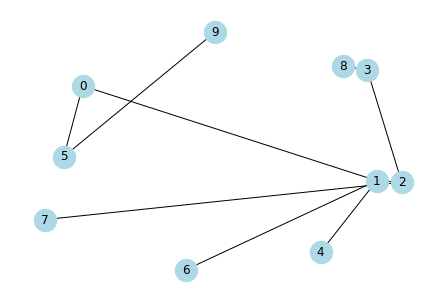

In [77]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [78]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 1), (0, 5), (1, 4), (1, 6), (1, 2), (2, 7), (2, 3), (3, 8), (5, 9)]),
 9)

In [79]:
mstp.size(weight='weight')

2.0

## How to get list of edges for your algorithm

In [80]:
# edges consists of (a, b, weight)
edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges().data()))
nodes = list(G.nodes)

In [81]:
edges[:5]

[(0, 1, 0), (0, 2, 2), (0, 3, 10), (0, 4, 1), (0, 5, 0)]

In [82]:
nodes[:5]

[0, 1, 2, 3, 4]

## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [83]:
import time
from tqdm import tqdm

In [84]:
NUM_OF_ITERATIONS = 1000

In [85]:
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    graph = gnp_random_connected_graph(100, 0.1, False)
    
    start = time.time()
    tree.minimum_spanning_tree(graph, algorithm="prim")
    end = time.time()
    
    time_taken += end - start
    
time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:02<00:00, 426.06it/s]


0.0008254241943359375

## Prima Algorithm

In [86]:
def prima_algorithm(nodes, edges):   
    """Implementation of Prima's algorithm."""
    nodes_len_initial = len(nodes)
    points = set([nodes[0]])
    carcas = set()
    total_points = 1

    while total_points < nodes_len_initial:
        smallest_path = (float('inf'), float('inf'), float('inf'))

        for edge in edges:
            if edge[2] <= smallest_path[2]:
                a = edge[0] in points
                b = edge[1] in points
                if (a and (not b)):
                    smallest_path = edge
                    e=1
                elif ((not a) and b):
                    smallest_path = edge
                    e=0

        carcas.add(smallest_path)
        points.add(smallest_path[e])
        edges.remove(smallest_path)        
        total_points += 1

    return carcas

In [87]:
# get values from G graph
nodes = list(G.nodes)
graph_edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges().data()))

carcas = prima_algorithm(nodes, graph_edges)

# convert to G graph
G_prima_algorithm = nx.Graph()  
G_prima_algorithm.add_weighted_edges_from(carcas)

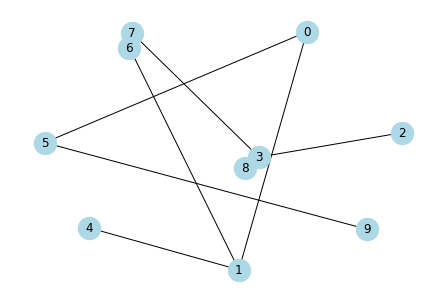

In [88]:
nx.draw(G_prima_algorithm, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [89]:
G_prima_algorithm.edges(), len(G_prima_algorithm.edges())

(EdgeView([(3, 8), (3, 7), (3, 2), (1, 6), (1, 0), (1, 4), (6, 7), (0, 5), (5, 9)]),
 9)

In [90]:
G_prima_algorithm.size(weight='weight')

2.0

## Kruskal Algorithm

In [91]:
def kruskal_algorithm(nodes, edges):
    """Implementation of Kruskal's algorithm."""
    edges = sorted(edges, key=lambda edge: edge[2])
    nodes_len_initial = len(nodes)
    points = set()
    carcas = set()
    total_edges = 0
    
    groups = []

    while total_edges < nodes_len_initial-1:
        edge = edges.pop(0)

        for group in groups:
            if (edge[0] in group) and (edge[1] in group):
                break

        else:
            if (edge[0] not in points) and (edge[1] not in points):
        
                groups.append([edge[0], edge[1]])
                points.add(edge[0])
                points.add(edge[1])
                
                carcas.add(edge)
                
                total_edges += 1
                
            elif ((edge[0] in points) and (edge[1] not in points)) or ((edge[0] not in points) and (edge[1] in points)):  
                
                for group_n in range(len(groups)):
                    if (edge[0] in groups[group_n]) or (edge[1] in groups[group_n]):
                        groups[group_n] += [edge[0], edge[1]]
        
                        points.add(edge[0])
                        points.add(edge[1])
                        carcas.add(edge)
                        
                        total_edges += 1                                    
            else:
                group_a, group_a = None, None

                for group_n in range(len(groups)):
                    if edge[0] in groups[group_n]:
                        group_a = group_n
                
                for group_n in range(len(groups)):
                    if edge[1] in groups[group_n]:
                        group_b = group_n
                
                if (group_a is not None) and (group_a is not None):
                    group_aa = groups.pop(group_a if group_a < group_b else group_a-1)
                    group_bb = groups.pop(group_b if group_a > group_b else group_b-1)
                    
                    groups.append(group_aa+group_bb)
                    carcas.add(edge)
                    
                    total_edges += 1
                
    return carcas   
    

In [92]:
# get values from G graph
nodes = list(G.nodes)
graph_edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges().data()))

carcas = kruskal_algorithm(nodes, graph_edges)

print(carcas)

# convert to G graph
G_kruskal_algorithm = nx.Graph()  
G_kruskal_algorithm.add_weighted_edges_from(carcas)

{(1, 2, 1), (3, 8, 1), (1, 6, 0), (0, 1, 0), (0, 5, 0), (1, 4, 0), (5, 9, 0), (2, 7, 0), (2, 3, 0)}


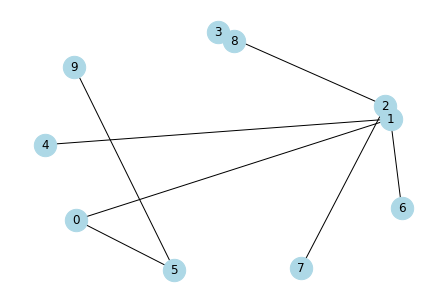

In [93]:
nx.draw(G_kruskal_algorithm, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [94]:
G_kruskal_algorithm.edges(), len(G_kruskal_algorithm.edges())

(EdgeView([(1, 2), (1, 6), (1, 0), (1, 4), (2, 7), (2, 3), (3, 8), (0, 5), (5, 9)]),
 9)

In [95]:
G_kruskal_algorithm.size(weight='weight')

2.0

## Speed tests

In [97]:
import time
from tqdm import tqdm

In [98]:
NUM_OF_ITERATIONS = 1000
NUM_OF_NODES = 100

### Prima Algorithm

In [99]:
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    graph = gnp_random_connected_graph(NUM_OF_NODES, 0.1, False)
    
    start = time.time()
    tree.minimum_spanning_tree(graph, algorithm="prim")
    end = time.time()
    
    time_taken += end - start
    
time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:57<00:00, 17.35it/s]


0.020596543073654175

In [100]:
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(NUM_OF_NODES, 0.1, False)
    
    # note that we should not measure time of graph convertion
    nodes = list(G.nodes)
    graph_edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges().data()))
    
    start = time.time()
    carcas = prima_algorithm(nodes, graph_edges)
    end = time.time()
    
    # note that we should not measure time of graph creation
    G_prima_my = nx.Graph()  
    G_prima_my.add_weighted_edges_from(carcas)
    
    time_taken += end - start
    
time_taken / NUM_OF_ITERATIONS

 29%|██▉       | 290/1000 [01:36<03:56,  3.01it/s]

KeyboardInterrupt



### Kruskal Algorithm

In [101]:
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    graph = gnp_random_connected_graph(NUM_OF_NODES, 0.1, False)
    
    start = time.time()
    tree.minimum_spanning_tree(graph, algorithm="kruskal")
    end = time.time()
    
    time_taken += end - start
    
time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [01:00<00:00, 16.48it/s]


0.022927165508270262

In [102]:
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(NUM_OF_NODES, 0.1, False)
    
    # note that we should not measure time of graph convertion
    nodes = list(G.nodes)
    graph_edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges().data()))
    
    start = time.time()
    carcas = kruskal_algorithm(nodes, graph_edges)
    end = time.time()
    
    # note that we should not measure time of graph creation
    G_prima_my = nx.Graph()  
    G_prima_my.add_weighted_edges_from(carcas)
    
    time_taken += end - start
    
time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [01:38<00:00, 10.14it/s]


0.05408346128463745